![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 4: implementación de la convolución
```

## **Practica 4: Implementación de la convolución discreta**

###**4.1. Importación de Librerías**

* **Librerias a utilizar:**

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
plt.style.use(["dark_background"])

###**4.2. Cálculo de la convolución usando una funcion de alto nivel**

![https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg](https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg)


![https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp](https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp)

* **Creación de la señal y el kernel**

In [19]:
x_n = np.concatenate((np.zeros(30), np.ones(10), 3*np.ones(30), np.zeros(10), -1*np.ones(10), np.zeros(20), np.zeros(30), np.ones(30)))

h_n = np.exp(-np.linspace(-2,2,20)**2)
len_x = len(x_n)
len_h = len(h_n)

* **Mostrando señales creadas**

(0.0, 20.0)

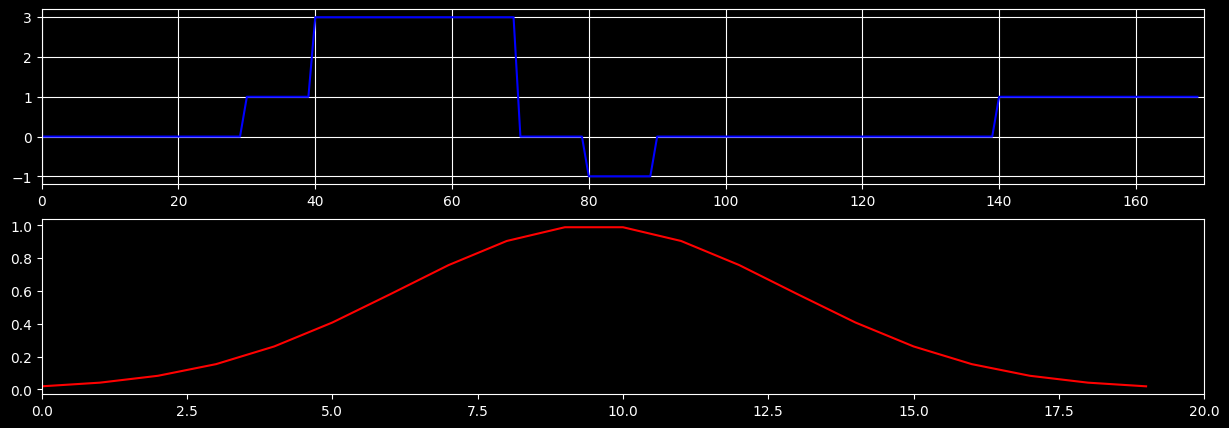

In [20]:

plt.figure(figsize=(15,5))
plt.subplot(211)
plt.plot(x_n, "b")
plt.xlim([0,len_x])
plt.grid(True)
plt.subplot(212)
plt.plot(h_n, "r")
plt.xlim([0,len_h])

 * **Cálculo y gráfica de la convolución**

In [21]:
y_n=np.convolve(x_n,h_n)


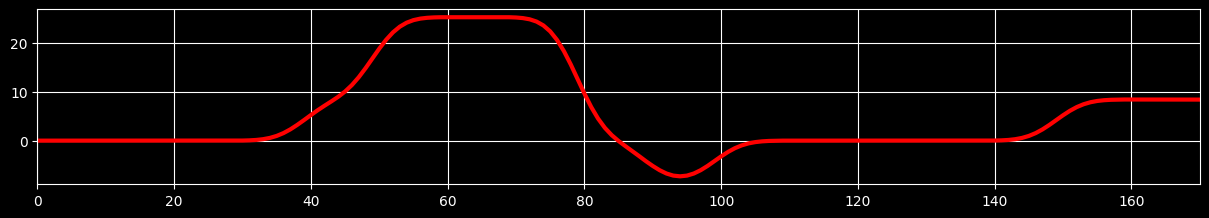

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(211)
plt.plot(y_n, "r", linewidth=3)
plt.xlim([0,len_x])
plt.grid(True)
plt.show()



###**4.2. Detalles de la convolución**
>*Longitud de la convolución de 2 señales.*

>*Efecto del kernel*

* **Creación de señales y aplicación de la convolución**





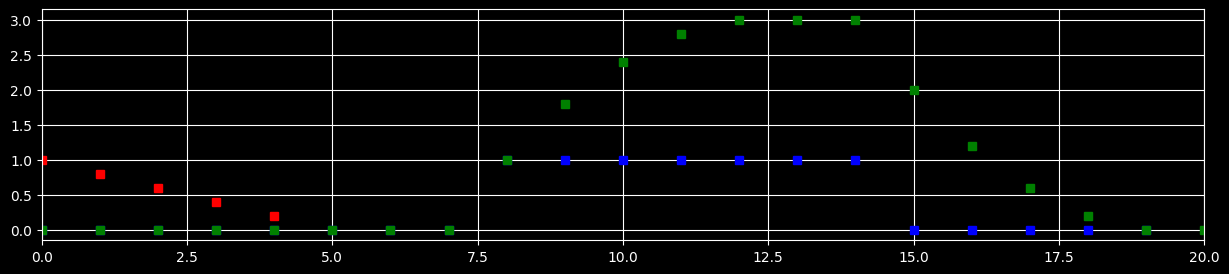

In [61]:
pulso =np.zeros (20)
pulso[8:15] = 1


filtro = np.array([1, 0.8, 0.6, 0.4, 0.2])

n_pulso=len(pulso)
n_filtro= len(filtro)
n_convolucion=n_pulso + n_filtro - 1

y_n= np.convolve(pulso,filtro, 'full')
plt.figure(figsize=(15,3))
plt.plot(pulso,"bs",linewidth=3 )
plt.plot(filtro,"rs",linewidth=3)
plt.plot(y_n,"gs",linewidth=3)
plt.xlim([0,n_pulso])
plt.grid(True)
plt.show()

* **Graficando resultados**

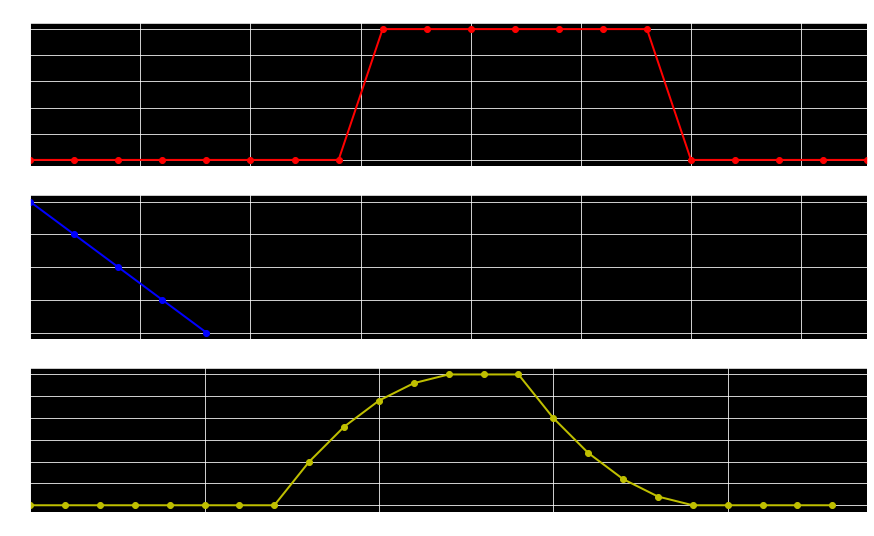

###**4.3. Animación de la convolución**

*Se usarán las señales creadas en el apartado anterior*

In [52]:
import time
import warnings
import pylab as pl
warnings.filterwarnings("ignore")


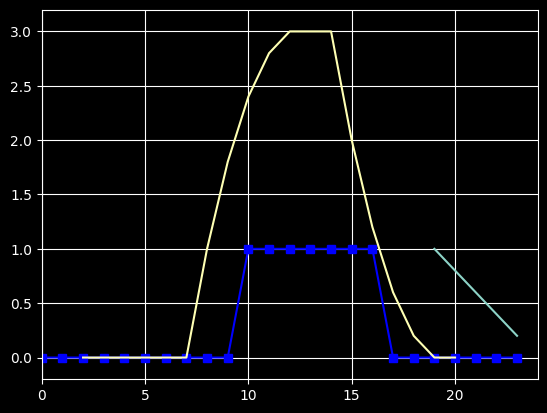

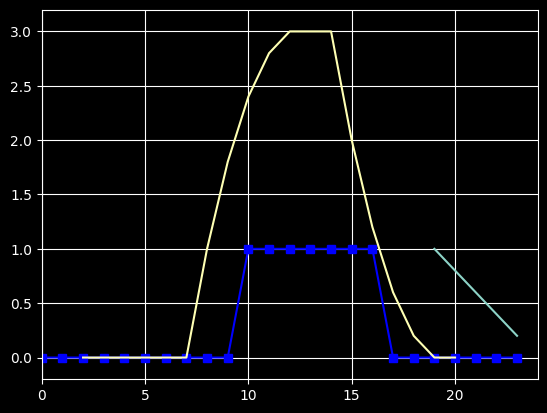

In [59]:
filtro_invertido = filtro [::-1]
mitad_filtro = int (np.floor(n_filtro/2))
pulso_pad = np.concatenate ((np.zeros(mitad_filtro), pulso, np.zeros(mitad_filtro)))

convolucion = np.zeros_like(pulso_pad)

for ti in  range(mitad_filtro,len(pulso_pad)- mitad_filtro):

   ventana_pulso_pad = pulso_pad[ti - mitad_filtro : ti + mitad_filtro +1]
   convolucion[ti] = np.sum(ventana_pulso_pad * filtro_invertido)

plt.cla()
plt.plot(pulso_pad,"bs-")
plt.plot(np.arange(ti - mitad_filtro , ti + mitad_filtro +1),filtro)
plt.plot(np.arange(mitad_filtro,ti),convolucion[mitad_filtro:ti])
plt.xlim(0,n_convolucion)
plt.ylim(-0.2,3.2)
plt.grid(True)

display.clear_output(wait=True)
display.display(plt.gcf())
time.sleep(0.5)

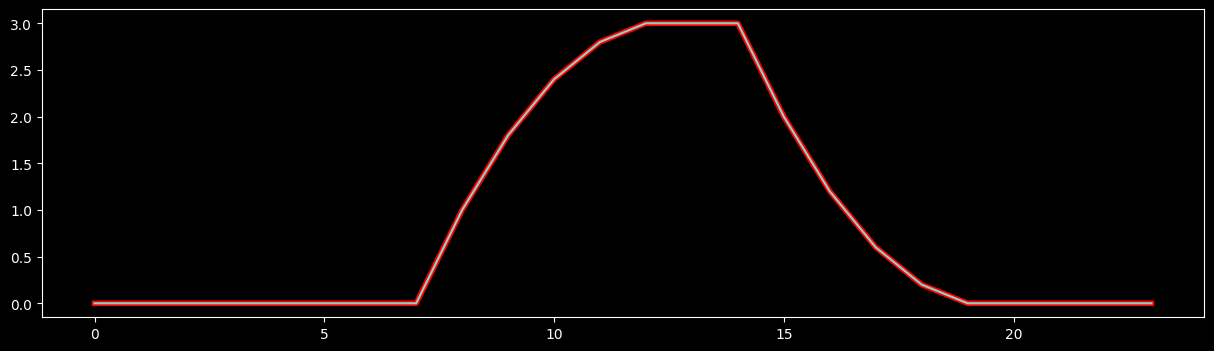

In [65]:
plt.figure(figsize=(15,4))
plt.plot(y_n,"r", linewidth=4)
plt.plot(convolucion)